# Planar Data Classification with one Hidden Layer

#### Learn to:
1. Implement a 2-Class classification neural network with a single hidden layer
2. Use non-linear activation like tanh
3. Compute cross entropy loss
4. Implement forward and backward propagation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from testCases import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

%matplotlib inline

np.random.seed(1)

### Dataset

1. Numpy array X that contains features x1, x2.
2. Numpy array Y that contains labels (red:0, blue:1).

Matrix X is (2,400) and has got 400 samples
Vector Y is (1,400) and has the labels for the matrix X.

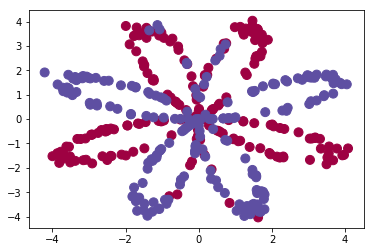

In [12]:
X,Y= load_planar_dataset()
plt.scatter(X[0,:], X[1,:], c=Y, s=80, cmap = plt.cm.Spectral)
m = Y.size

### Logistic Regression Model

The dataset is not linearly separable, so logistic regression doesn't perform well. 

Accuracy of logistic regression: 47 % (percentage of correctly labelled datapoints)


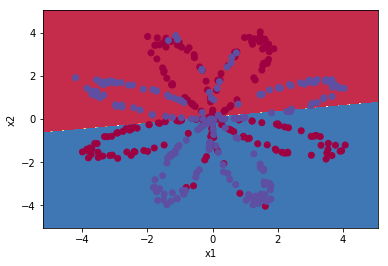

In [16]:
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X.T, Y.T)
plot_decision_boundary(lambda x:clf.predict(x), X, Y)

LR_predictions = clf.predict(X.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +'% '+ "(percentage of correctly labelled datapoints)")

## Neural Network Model

The general methodology to build a NN is to:
1. Define the neural network structure
2. Initialize model parameters
3. Loop:
    - Implement forward prop. (activation)
    - Compute loss
    - Implement backward prop. to get gradients
    - Update parameters (gradient descent)


We make use of helper functions to accomplish these tasks. 

** 1. Defining Structure of the NN:**

Defines three variables:
    - n_x: the size of the input layer
    - n_h: the size of the hiffen layer(set to 4)
    - n_y: the size of the output layer

In [18]:
def layer_sizes(X,Y):
    '''
    Arguments: X and Y the feature set and label set
    
    Output:
    n_x, n_y and n_h
    
    '''    
    n_x = X.shape[0]
    n_h = 4
    n_y = Y.shape[0]
    return(n_x, n_h, n_y)


** 2. Initializing Model Parameters: **

Implement function initialize_parameters to initialize the weight matrices with random values.

Initialize bias vectors to zeros.

In [89]:
def initialize_parameters(n_x, n_h, n_y):
    '''
    Arguments: n_x, n_y, n_h
    
    Output:
    parameters -- Python dictionary with parameters:
                W1 -- weight matrix of size (n_h, n_x)
                b1 -- bias vector of shape (n_h,1)
                W2 -- Weight matrix of size (n_y, n_h)
                b2 -- Weight matrix of size (n_y,1)
    '''
    
    
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    
    parameters  = {"W1" : W1,
                   "b1" : b1,
                   "W2" : W2,
                   "b2" : b2}
    return parameters
    

** 3. Forward Propagation **


     - Retrieve each parameter obtained using initialize_parameters
     
    - Implement forward propagation by computing Z1, A1, Z2 and A2.
    
    - Values have to be stored in cache and will be needed in backprop. 

In [90]:
def forward_propagation(X,parameters):
    '''
    Arguments: 
    X -- Input vector of size(n_x, m)
    parameters -- python dictionary containing initialized values for weights and biases
    
    Output:
    A2 -- sigmoid activation of the second activation
    cache -- a  dictionary containing Z1, Z2, A1, A2
    '''
    
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    Z1 = np.dot(W1, X)+b1
    A1 = np.tanh(Z1)
    
    Z2 = np.dot(W2, A1)+b2
    A2 = sigmoid(Z2)
    
    cache = {"Z1": Z1,
            "A1": A1,
            "Z2": Z2,
            "A2": A2}
    
    return A2, cache

** 4. Cross-Entropy Loss**

There are various ways to compute the cross-entropy loss. However we will use the sum of log probabilities  and then squeeze the cost

In [91]:
def compute_cost(A2, Y, parameters):
    
    m = Y.shape[0]
    
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    
    logprobs = np.multiply(np.log(A2), Y) + np.multiply((1-Y), np.log(1-A2))
    cost = -1.0/m * np.sum(logprobs) 
    cost = np.squeeze(cost)
    assert(isinstance(cost, float))

    return cost

In [92]:
n_x, n_h, n_y = initialize_parameters_test_case()

parameters = initialize_parameters(n_x, n_h, n_y)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

X_assess, parameters = forward_propagation_test_case()

A2, cache = forward_propagation(X_assess, parameters)

# Note: we use the mean here just to make sure that your output matches ours. 
print(np.mean(cache['Z1']) ,np.mean(cache['A1']),np.mean(cache['Z2']),np.mean(cache['A2']))

A2, Y_assess, parameters = compute_cost_test_case()

print("cost = " + str(compute_cost(A2, Y_assess, parameters)))

W1 = [[-0.01099891 -0.00172428]
 [-0.00877858  0.00042214]
 [ 0.00582815 -0.01100619]
 [ 0.01144724  0.00901591]]
b1 = [[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]
W2 = [[ 0.00502494  0.00900856 -0.00683728 -0.0012289 ]]
b2 = [[ 0.]]
(-0.00049975577774199022, -0.00049696335323177901, 0.00043818745095914653, 0.50010954685243103)
cost = 2.07875968133


** 5. Gradient Descent **

This is the backward propagation step of the entire process. To Compute dz1, we compute g1(Z1) and g1 is the tanh function.

In [93]:
def backward_propagation(parameters, cache, X, Y):
    
    m= Y.shape[0]
    
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    
    A1 = cache["A1"]
    A2 = cache["A2"]
    
    dZ2 = A2 - Y
    dW2 = (1/m) * np.dot(dZ2, A1.T)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.multiply(np.dot(W2.T, dZ2), (1 - np.power(A1, 2)))
    dW1 = (1/m) * np.dot(dZ1, X.T)
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads
    

** 6. Parameter Update Rule: **

We will use (dW1, dW2, db1, db2) to update W1, W2, b1,b2. The gradient descent rule is used and learning parameter is *a*. 

In [94]:
def update_parameters(parameters, grads, learning_rate = 1.2):
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

** 7. Integration **

Integrate all parts into a nn-model() function:

In [95]:
def nn_model(X, Y, n_h, num_iterations = 10000, print_cost = False):
    
    np.random.seed(3)
    n_x = layer_sizes(X,Y)[0]
    n_y = layer_sizes(X,Y)[1]
    
    parameters = initialize_parameters(n_x,n_h,n_y)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    for i in range(0, num_iterations):
        
        A2, cache  = forward_propagation(X, parameters)
        cost = compute_cost(A2, Y, parameters)
        grads = backward_propagation(parameters, cache, X, Y)
        parameters = update_parameters(parameters, grads)
        
        if print_cost and i % 500 == 0:
            print ("Cost after iteration "+str(i)+" : "+ str(cost))
            
    return parameters
    

**8. Predictions **

Use the model to predict. Use forward propagation to predict results. 

    - Set a threshold above which the data input is classified as a certain class and another class, below that threshold. 
    - A2 > 0.5 - Class 0 or 1.

In [96]:
def predict(parameters, X):
    
    A2, cache = forward_propagation(X, parameters)
    predictions = (A2>0.5)
    
    return predictions

In [98]:
# Build a model with a n_h-dimensional hidden layer
parameters = nn_model(X, Y, n_h = 4, num_iterations = 10000, print_cost=True)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))

Cost after iteration 0 : 1109.0403709


/home/deepan/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: divide by zero encountered in log
/home/deepan/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in multiply


Cost after iteration 500 : nan
Cost after iteration 1000 : nan
Cost after iteration 1500 : nan
Cost after iteration 2000 : nan
Cost after iteration 2500 : nan
Cost after iteration 3000 : nan
Cost after iteration 3500 : nan
Cost after iteration 4000 : nan
Cost after iteration 4500 : nan
Cost after iteration 5000 : nan
Cost after iteration 5500 : nan
Cost after iteration 6000 : nan
Cost after iteration 6500 : nan
Cost after iteration 7000 : nan
Cost after iteration 7500 : nan
Cost after iteration 8000 : nan
Cost after iteration 8500 : nan
Cost after iteration 9000 : nan
Cost after iteration 9500 : nan


ValueError: total size of new array must be unchanged

{'W1': array([[ 2514.81603474,  1025.05118388],
        [  159.98796973,  -548.69703477],
        [  365.10075802, -2146.04345249],
        [  101.2459106 ,  -168.59375614]]),
 'W2': array([[ -86.59207926,  392.74729684,  -27.43010789,  238.82739543],
        [-218.2978076 ,   75.39093236, -337.91853391,  -14.31724629],
        [-132.74319109,  114.95837947, -301.60008446,   30.7928115 ],
        [-220.25618791,   77.99466858, -341.56877308,   32.68548364]]),
 'b1': array([[ -858.11604131],
        [ -385.23342956],
        [-1172.11681109],
        [ -248.47540202]]),
 'b2': array([[ -79.61357199],
        [ 100.29331183],
        [  32.35099163],
        [ 126.48082037]])}